# Salary data

In [1]:
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
#from sklearn.linear_model import LinearRegression


In [2]:
upload =files.upload()

Saving Salary_Data (1).csv to Salary_Data (1).csv


In [3]:
data=pd.read_csv('Salary_Data (1).csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [33]:
data1=data.copy()

In [4]:
data.count

<bound method DataFrame.count of     YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0>

<ipython-input-5-30c384b45957>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

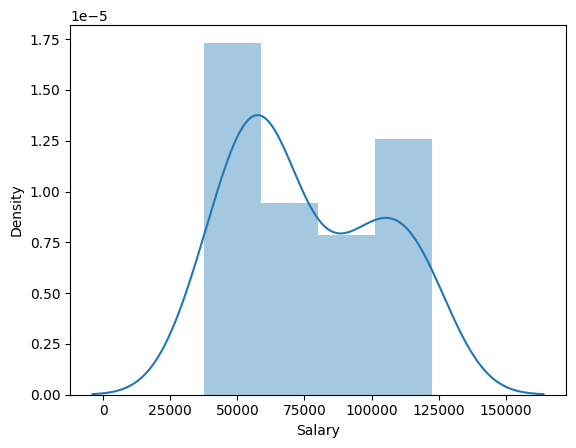

In [5]:
import seaborn  as sns
sns.distplot(data['Salary'])

<ipython-input-6-f0f3c37637f8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

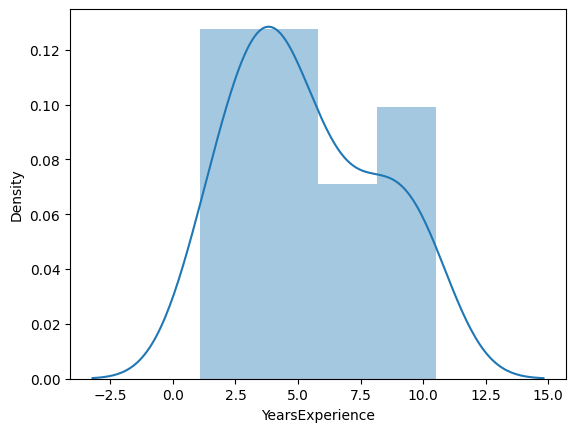

In [6]:
sns.distplot(data['YearsExperience'])

In [7]:
import statsmodels.formula.api as smf
model=smf.ols('Salary~YearsExperience',data=data).fit()

<Axes: xlabel='YearsExperience', ylabel='Salary'>

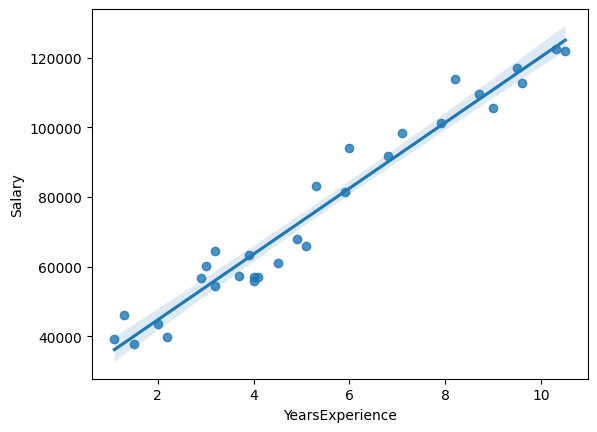

In [8]:
sns.regplot(x="YearsExperience",y="Salary",data=data)

In [9]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [10]:
data['predicted_values']=model.fittedvalues

In [11]:
data['Error_values']=model.resid

In [12]:
data.head()

,YearsExperience,Salary,predicted_values,Error_values
0,1.1,39343.0,36187.158752,3155.841248
1,1.3,46205.0,38077.151217,8127.848783
2,1.5,37731.0,39967.143681,-2236.143681
3,2.0,43525.0,44692.124842,-1167.124842
4,2.2,39891.0,46582.117306,-6691.117306


In [13]:
data['Y']=25792.200199+9449.962321*data['YearsExperience']+data['Error_values']

In [14]:
data.head()

,YearsExperience,Salary,predicted_values,Error_values,Y
0,1.1,39343.0,36187.158752,3155.841248,39343.000000
1,1.3,46205.0,38077.151217,8127.848783,46205.000000
2,1.5,37731.0,39967.143681,-2236.143681,37731.000000
3,2.0,43525.0,44692.124842,-1167.124842,43524.999999
4,2.2,39891.0,46582.117306,-6691.117306,39890.999999


In [15]:
print(model.rsquared,model.rsquared_adj)

0.9569566641435086 0.9554194021486339


# **by using log transformation(salary data)**

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [35]:
upload =files.upload()

Saving Salary_Data (1).csv to Salary_Data (1) (1).csv


In [36]:
data1=pd.read_csv('Salary_Data (1).csv')
data1.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [68]:
data1['Salary_log']=np.log(data1['Salary'])
data1.head()

,YearsExperience,Salary,Salary_log
0,1.1,39343.0,10.580073
1,1.3,46205.0,10.740843
2,1.5,37731.0,10.538237
3,2.0,43525.0,10.681091
4,2.2,39891.0,10.593906


<ipython-input-69-21fcdb84b846>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

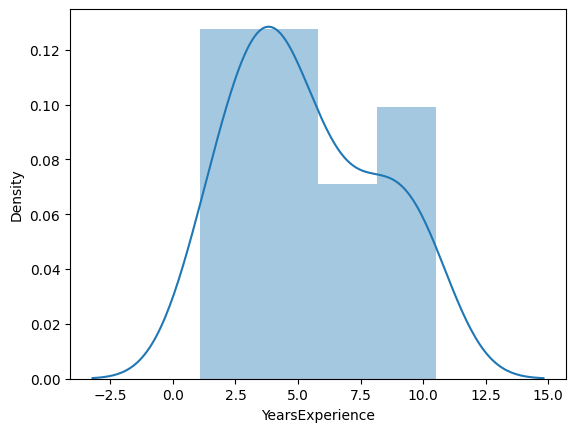

In [69]:
sns.distplot(data1['YearsExperience'])

<ipython-input-70-08c799ed4ada>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['Salary_log'])


<Axes: xlabel='Salary_log', ylabel='Density'>

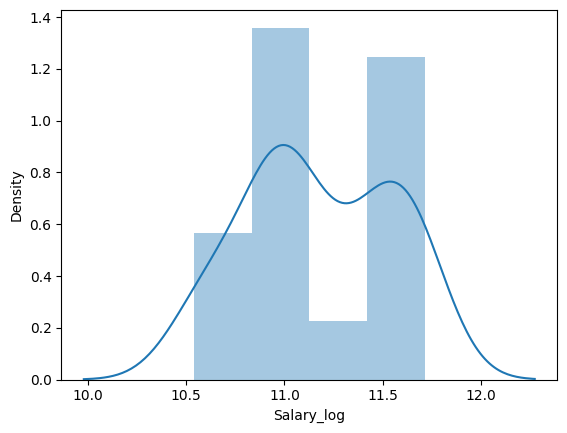

In [70]:
sns.distplot(data1['Salary_log'])

In [71]:
x=data1['YearsExperience']
y=data1['Salary_log']

In [72]:
model=smf.ols('y~x',data=data1).fit()

<Axes: xlabel='YearsExperience', ylabel='Salary_log'>

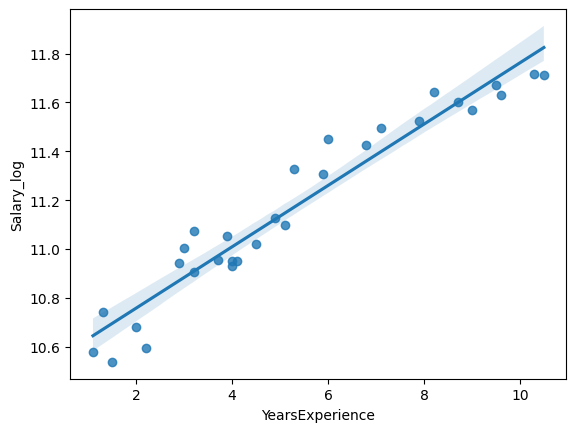

In [73]:
sns.regplot(x=x,y=y,data=data1)

In [74]:
model.params

Intercept    10.507402
x             0.125453
dtype: float64

In [76]:
data1['Predicted_values']=model.fittedvalues

In [77]:
data1['Error_values']=model.resid

In [80]:
data1['Y']=10.507402+0.125453*data1['YearsExperience']+data1['Error_values']

In [81]:
data1.head()

,YearsExperience,Salary,Salary_log,Predicted_values,Error_values,Y
0,1.1,39343.0,10.580073,10.645400,-0.065327,10.580074
1,1.3,46205.0,10.740843,10.670491,0.070353,10.740844
2,1.5,37731.0,10.538237,10.695581,-0.157344,10.538238
3,2.0,43525.0,10.681091,10.758308,-0.077217,10.681091
4,2.2,39891.0,10.593906,10.783398,-0.189492,10.593906


In [83]:
print(model.rsquared,model.rsquared_adj)

0.9319671194084196 0.929537373673006


# Square Root Transformation(salary data)

In [84]:
upload=files.upload()

Saving Salary_Data (1).csv to Salary_Data (1) (2).csv


In [86]:
data=pd.read_csv('Salary_Data (1).csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [87]:
data['salary_sqrt']=np.sqrt(data['Salary'])
data.head()

,YearsExperience,Salary,salary_sqrt
0,1.1,39343.0,198.350700
1,1.3,46205.0,214.953483
2,1.5,37731.0,194.244691
3,2.0,43525.0,208.626460
4,2.2,39891.0,199.727314


<ipython-input-101-f0f3c37637f8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

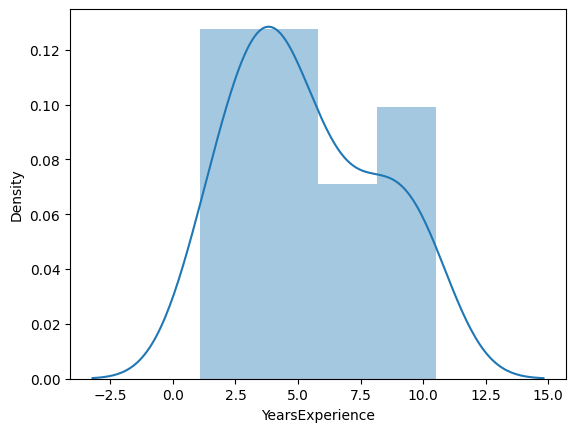

In [101]:
sns.distplot(data['YearsExperience'])

<ipython-input-89-6feeeb31666a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['salary_sqrt'])


<Axes: xlabel='salary_sqrt', ylabel='Density'>

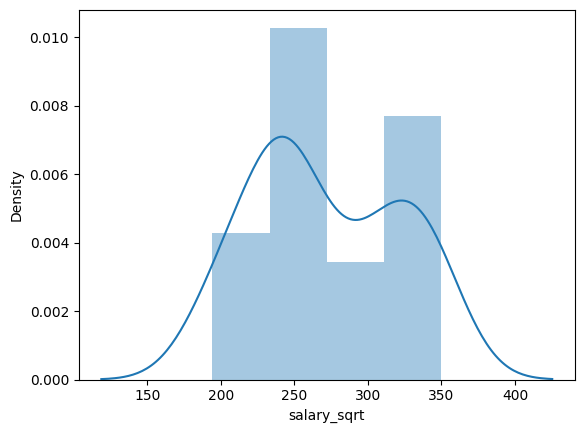

In [89]:
sns.distplot(data['salary_sqrt'])

In [90]:
x=data['YearsExperience']
y=data['salary_sqrt']

In [96]:
model=smf.ols('y~x',data=data).fit()

<Axes: xlabel='YearsExperience', ylabel='salary_sqrt'>

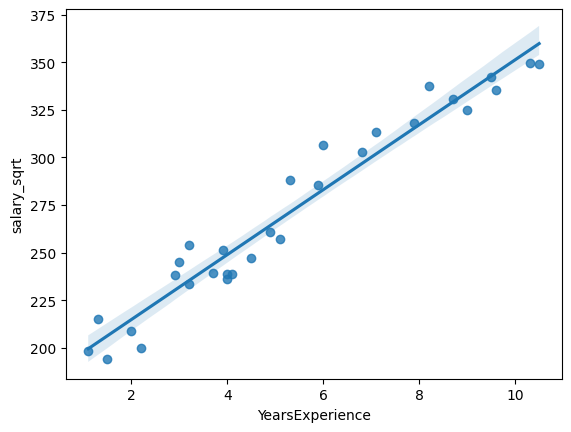

In [97]:
sns.regplot(x=x,y=y,data=data)

In [100]:
model.params

Intercept    180.700221
x             17.056532
dtype: float64

In [102]:
data['Predicted_values']=model.fittedvalues
data['Error_values']=model.resid
data['Y']=180.700221+17.056532*data['YearsExperience']+data['Error_values']
data.head()

,YearsExperience,Salary,salary_sqrt,Predicted_values,Error_values,Y
0,1.1,39343.0,198.350700,199.462407,-1.111707,198.350699
1,1.3,46205.0,214.953483,202.873713,12.079770,214.953483
2,1.5,37731.0,194.244691,206.285019,-12.040328,194.244691
3,2.0,43525.0,208.626460,214.813286,-6.186825,208.626460
4,2.2,39891.0,199.727314,218.224592,-18.497278,199.727314


In [103]:
print(model.rsquared,model.rsquared_adj)

0.9498353533865289 0.9480437588646192


** ->By using normal,log,sqrt transformation the best results are obtained from sqrt transformation**

# Delivery Time

In [16]:
upload=files.upload()

Saving delivery_time (1).csv to delivery_time (1).csv


In [17]:
data=pd.read_csv('delivery_time (1).csv')
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [18]:
data.rename(columns={'Delivery Time':'DeliveryTime','Sorting Time':'SortingTime'},inplace=True)

In [19]:
data.head()

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


delivaery time is the dependent variable

In [20]:
model=smf.ols('DeliveryTime~SortingTime',data=data).fit()

<Axes: xlabel='SortingTime', ylabel='DeliveryTime'>

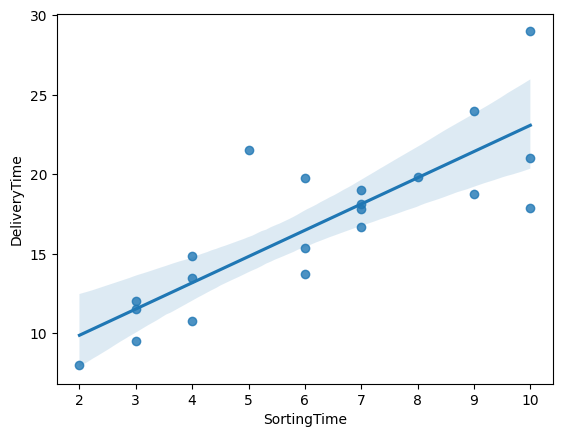

In [21]:
sns.regplot(x='SortingTime',y='DeliveryTime',data=data)

In [22]:
model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [23]:
data['prediction_values']=model.fittedvalues

In [24]:
data['Error_values']=model.resid

In [25]:
data['Y']=6.582734+1.649020*data['SortingTime']+data['Error_values']
data.head()

,DeliveryTime,SortingTime,prediction_values,Error_values,Y
0,21.00,10,23.072933,-2.072933,21.000001
1,13.50,4,13.178814,0.321186,13.500000
2,19.75,6,16.476853,3.273147,19.750001
3,24.00,9,21.423913,2.576087,24.000001
4,29.00,10,23.072933,5.927067,29.000001


In [26]:
print(model.rsquared,model.rsquared_adj)

0.6822714748417231 0.6655489208860244


# log transformation(Delivery time)

In [104]:
upload=files.upload()

Saving delivery_time (1).csv to delivery_time (1) (1).csv


In [105]:
data=pd.read_csv('delivery_time (1).csv')
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [109]:
data.rename(columns={'Delivery Time':'DeliveryTime','Sorting Time':'SortingTime'},inplace=True)

In [119]:
data['DeliveryTime_log']=np.log(data['DeliveryTime'])
data.head()

,DeliveryTime,SortingTime,DeliveryTime_log
0,21.00,10,3.044522
1,13.50,4,2.602690
2,19.75,6,2.983153
3,24.00,9,3.178054
4,29.00,10,3.367296


<ipython-input-126-a9da24348b62>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SortingTime'])


<Axes: xlabel='SortingTime', ylabel='Density'>

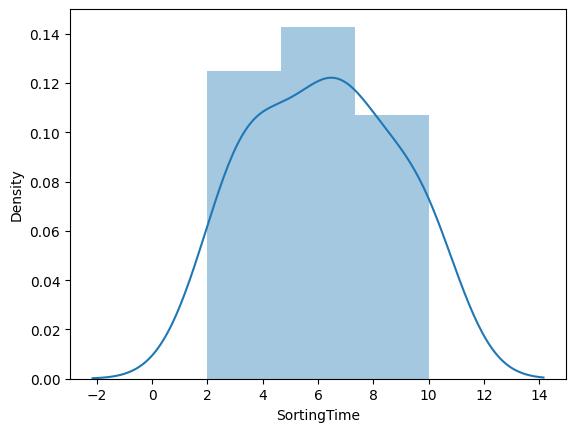

In [126]:
sns.distplot(data['SortingTime'])

<ipython-input-127-7ed751520cad>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['DeliveryTime_log'])


<Axes: xlabel='DeliveryTime_log', ylabel='Density'>

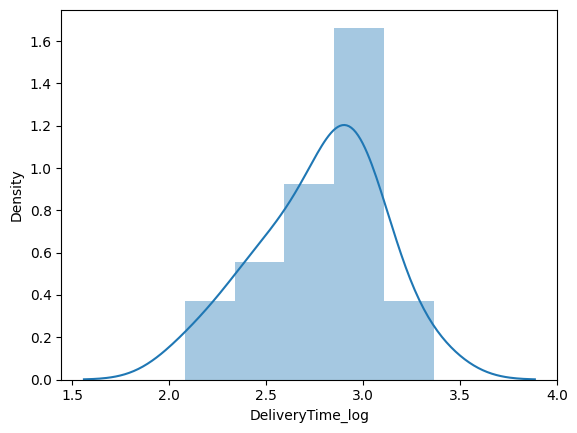

In [127]:
sns.distplot(data['DeliveryTime_log'])

In [120]:
x=data['SortingTime']
y=data['DeliveryTime_log']

In [121]:
model=smf.ols('y~x',data=data).fit()

<Axes: xlabel='SortingTime', ylabel='DeliveryTime_log'>

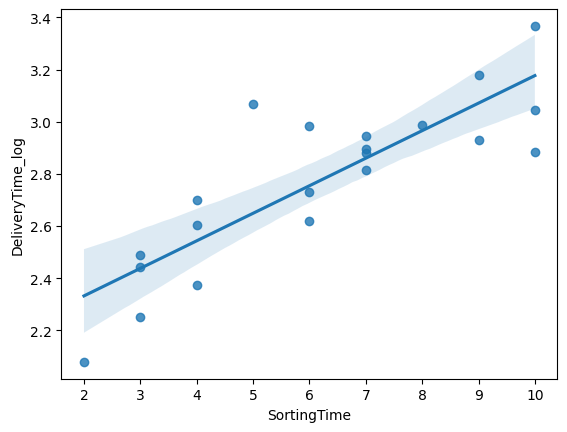

In [122]:
sns.regplot(x=x,y=y,data=data)

In [123]:
model.params

Intercept    2.121372
x            0.105552
dtype: float64

In [128]:
data['Predicted_values']=model.fittedvalues
data['Error_values']=model.resid
data['Y']=2.121372+0.105552*data['SortingTime']+data['Error_values']
data.head()


,DeliveryTime,SortingTime,DeliveryTime_log,Predicted_values,Error_values,Y
0,21.00,10,3.044522,3.176888,-0.132365,3.044527
1,13.50,4,2.602690,2.543578,0.059111,2.602691
2,19.75,6,2.983153,2.754681,0.228472,2.983156
3,24.00,9,3.178054,3.071336,0.106718,3.178058
4,29.00,10,3.367296,3.176888,0.190408,3.367300


In [129]:
print(model.rsquared,model.rsquared_adj)

0.7109478980584187 0.6957346295351776


# SQRT Transformation(DeliveryTime)

In [130]:
upload=files.upload()

Saving delivery_time (1).csv to delivery_time (1) (2).csv


In [131]:
data=pd.read_csv('delivery_time (1).csv')
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [134]:
data.rename(columns={'Delivery Time':'DeliveryTime','Sorting Time':'SortingTime'},inplace=True)

In [141]:
data['DeliveryTime_Sqrt']=np.sqrt(data['DeliveryTime'])

<ipython-input-139-78df9454f6a8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['DeliveryTime_Sqrt'])


<Axes: xlabel='DeliveryTime_Sqrt', ylabel='Density'>

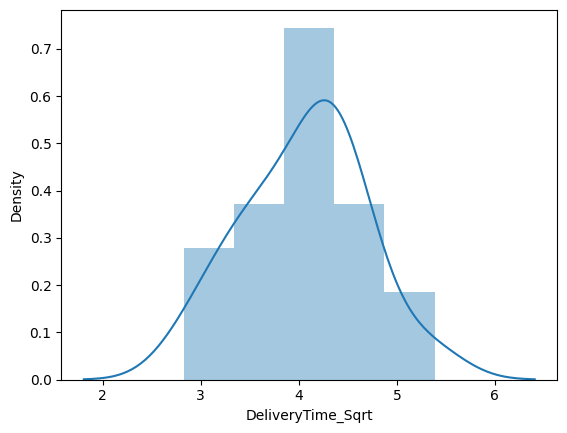

In [139]:
sns.distplot(data['DeliveryTime_Sqrt'])

<ipython-input-140-a9da24348b62>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SortingTime'])


<Axes: xlabel='SortingTime', ylabel='Density'>

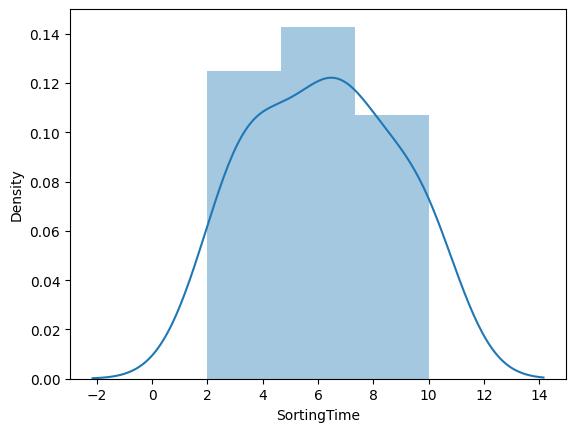

In [140]:
sns.distplot(data['SortingTime'])

In [142]:
x=data['SortingTime']
y=data['DeliveryTime_Sqrt']

In [143]:
model=smf.ols('y~x',data=data).fit()

<Axes: xlabel='SortingTime', ylabel='DeliveryTime_Sqrt'>

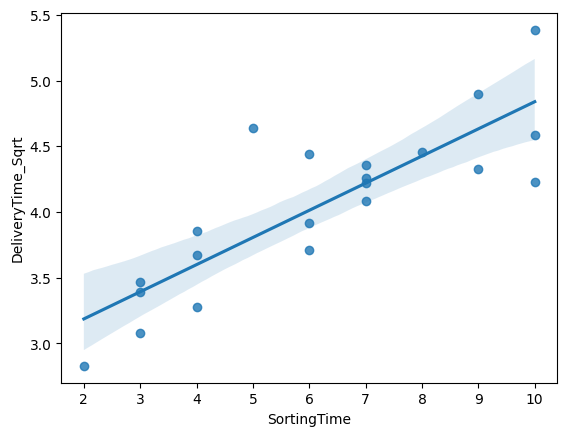

In [144]:
sns.regplot(x=x,y=y,data=data)

In [146]:
model.params

Intercept    2.772731
x            0.206632
dtype: float64

In [150]:
data['Predicted_values']=model.fittedvalues
data['Error_values']=model.resid
data['Y']=2.772731+0.206632*data['SortingTime']+data['Error_values']
data.head()

,DeliveryTime,SortingTime,DeliveryTime_Sqrt,Predicted_values,Error_values,Y
0,21.00,10,4.582576,4.839049,-0.256474,4.582577
1,13.50,4,3.674235,3.599258,0.074976,3.674235
2,19.75,6,4.444097,4.012522,0.431575,4.444098
3,24.00,9,4.898979,4.632417,0.266562,4.898981
4,29.00,10,5.385165,4.839049,0.546116,5.385167


In [151]:
print(model.rsquared,model.rsquared_adj)

0.704049871541756 0.6884735489913221


**In delivery dataset i have used 3 transformations but among all transformatioms log transformation gave the maximum result**
